In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
import warnings
from scipy.integrate import odeint
plt.rcParams["figure.figsize"] = [16,9]
# https://www.math.colostate.edu/~shipman/47/volume12009/bevivino.pdf
# see also https://www.datahubbs.com/how-to-analyze-dynamical-systems-taking-a-pendulum-to-chaos/
#warnings.filterwarnings('ignore')

In [267]:
def pendulum(stateIn, t, beta, gamma, wD, w0):
        """
        pendulum state equation
        """
        w, theta = stateIn
        stateOut = np.array([-2*beta*w - w0**2*np.sin(theta) + gamma*w0**2*np.cos(wD*t), w])
        return stateOut
    
# discretize time
tmax, n = 10, 10000
t = np.linspace(0, tmax, n)    

# set initial conditions and initial gamme
wInit, thetaInit = 0, 0
gamma = 1.5

# pendulum parameters and initial conditions
beta, wD = 3*np.pi/4, 2*np.pi
w0 = 5/2**wD

f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, gamma, wD, w0))
w, theta1=f.T

w0 = 2/5**wD
f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, gamma, wD, w0))
w, theta2=f.T


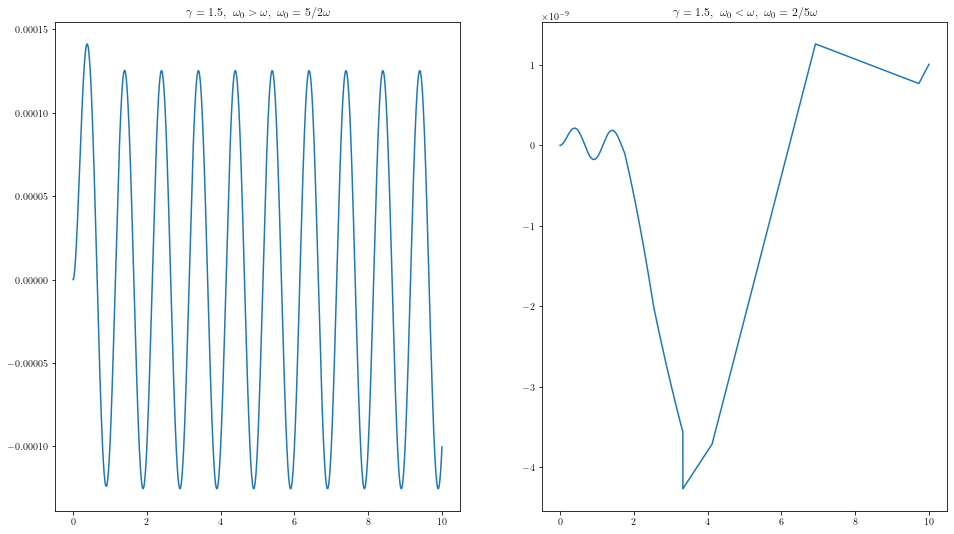

In [268]:
plt.subplot(1,2,1)
plt.plot(t,theta1)
plt.title('$\gamma=1.5,  \  \omega_0>\omega,  \  \omega_0=5/2\omega$')
plt.subplot(1,2,2)
plt.plot(t,theta2)
plt.title('$\gamma=1.5,  \  \omega_0<\omega,  \  \omega_0=2/5\omega$')


plt.show()

In [261]:
1*2**3*4

32

In [262]:
# discretize time
tmax, n = 10, 1000
t = np.linspace(0, tmax, n)    

# set initial conditions and initial gamme
wInit, thetaInit = 0, 0

# pendulum parameters and initial conditions
beta, wD, w0 = 3*np.pi/4, 2*np.pi, 3*np.pi

# repeat for many values of gamma:
gammas=np.linspace(1,1.2,100)
#gammas=np.linspace(1.05,1.095,500)
#gammas=np.array([1.01]) #gammas[0:2]
thetas=np.zeros(gammas.shape)
thetas[0]=thetaInit
for i,gamma in enumerate(gammas):
    # Integrate the pendulum equations on the time grid t
    f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, gamma, wD, w0))
    w, theta = f.T
    thetas[i] = theta[int(9*n/10):n].max()

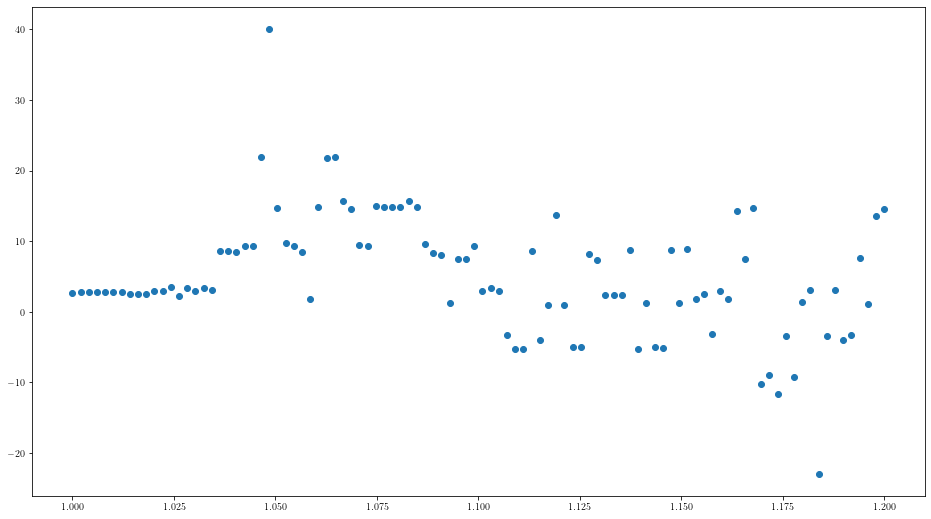

In [263]:
plt.scatter(gammas, thetas)
#plt.ylim([15, 20])

In [264]:
# discretize time
tmax, n = 40, 400000
t = np.linspace(0, tmax, n)    

# set initial conditions and initial gamme
wInit, thetaInit = 0, 0

# pendulum parameters and initial conditions
beta, wD, w0 = 3*np.pi/4, 2*np.pi, 3*np.pi

# repeat for many values of gamma:
#gammas=np.linspace(0.9,1,100)
gammas=np.array([1.06])
thetas=np.array(thetaInit)
#thetas=np.zeros(gammas.shape)
#thetas=np.zeros(gammas.shape)

for i,gamma in enumerate(gammas):
    # Integrate the pendulum equations on the time grid t
    f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, gamma, wD, w0))
    w, theta = f.T
    thetas[i] = theta.max()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
plt.plot(t,theta)

In [ ]:
idx=n/tmax*np.linspace(34,39,6)

In [ ]:
idx=idx.astype(int)

In [ ]:
theta[[idx]]

In [ ]:
plt.plot(t,theta)

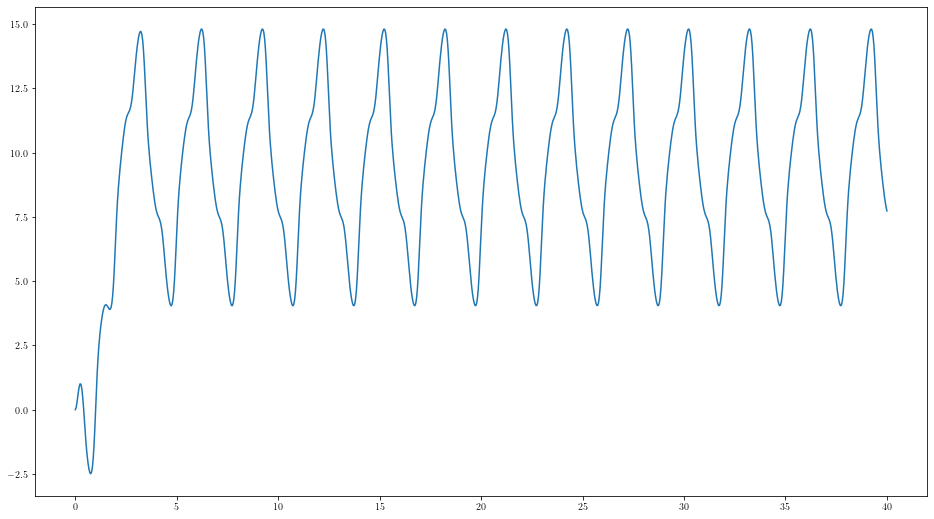

In [266]:
# discretize time
tmax, n = 40, 1000
t = np.linspace(0, tmax, n)    

f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, 1.078, wD, w0))
w, theta = f.T
plt.plot(t,theta)

In [265]:
theta[int(9*n/10):n]

array([6.03826807, 6.04012105, 6.04197432, ..., 6.03291006, 6.03476221,
       6.03661465])